# Research on car sales ads

Here we have a dataset of free vehicles advertisements, and our goal is to determine which factors influence the price of a vehicle. 

First, we should do some data preprocessing: fill in the missing values, clean spelling errors, and change data types. Also, we need to add some new columns to help our analysis. After doing so, we could explore our data and see if we could make any predictions.

First, we should do some data preprocessing: fill in the missing values that we could, clean spelling errors, and change data types.  Also, we need to add some new columns that will help in our analysis.  After doing so, we could explore our data and look if we could make any predictions.

## Open the data file and study the general information. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
import seaborn as sn

In [2]:
cars = pd.read_csv('../datasets/vehicles_us.csv')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [3]:
display(cars.head())

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [4]:
cars.describe(include='all')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
count,51525.000000,47906.000000,51525,51525,46265.000000,51525,43633.000000,51525,51525,42258,25572.0,51525,51525.00000
unique,NaN,NaN,100,6,NaN,5,NaN,3,13,12,NaN,354,NaN
top,NaN,NaN,ford f-150,excellent,NaN,gas,NaN,automatic,SUV,white,NaN,2019-03-17,NaN
freq,NaN,NaN,2796,24773,NaN,47288,NaN,46902,12405,10029,NaN,186,NaN
mean,12132.464920,2009.750470,NaN,NaN,6.125235,NaN,115553.461738,NaN,NaN,NaN,1.0,NaN,39.55476
std,10040.803015,6.282065,NaN,NaN,1.660360,NaN,65094.611341,NaN,NaN,NaN,0.0,NaN,28.20427
min,1.000000,1908.000000,NaN,NaN,3.000000,NaN,0.000000,NaN,NaN,NaN,1.0,NaN,0.00000
25%,5000.000000,2006.000000,NaN,NaN,4.000000,NaN,70000.000000,NaN,NaN,NaN,1.0,NaN,19.00000
50%,9000.000000,2011.000000,NaN,NaN,6.000000,NaN,113000.000000,NaN,NaN,NaN,1.0,NaN,33.00000
75%,16839.000000,2014.000000,NaN,NaN,8.000000,NaN,155000.000000,NaN,NaN,NaN,1.0,NaN,53.00000


In [5]:
display(cars['model'].value_counts().sort_index())
display(cars['condition'].value_counts())
display(cars['fuel'].value_counts())
display(cars['transmission'].value_counts())
display(cars['type'].value_counts())
display(cars['paint_color'].value_counts().sort_index())

acura tl             236
bmw x5               267
buick enclave        271
cadillac escalade    322
chevrolet camaro     414
                    ... 
toyota sienna        329
toyota tacoma        827
toyota tundra        603
volkswagen jetta     519
volkswagen passat    350
Name: model, Length: 100, dtype: int64

excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

gas         47288
diesel       3714
hybrid        409
other         108
electric        6
Name: fuel, dtype: int64

automatic    46902
manual        2829
other         1794
Name: transmission, dtype: int64

SUV            12405
truck          12353
sedan          12154
pickup          6988
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              633
convertible      446
other            256
offroad          214
bus               24
Name: type, dtype: int64

black      7692
blue       4475
brown      1223
custom     1153
green      1396
grey       5037
orange      231
purple      102
red        4421
silver     6244
white     10029
yellow      255
Name: paint_color, dtype: int64

In [6]:
report = cars.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / cars.shape[0] * 100).round(2)
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
is_4wd,25953,50.37
paint_color,9267,17.99
odometer,7892,15.32
cylinders,5260,10.21
model_year,3619,7.02
price,0,0.00
model,0,0.00
condition,0,0.00
fuel,0,0.00
transmission,0,0.00


### Conclusion

We have a lot of missing values in our dataset, and we can't just drop all these entries. We'll have a closer look at if we could fill them in the next section.

Also, we should change 'model_year' and 'cylinders' type to int (maybe 'odometer' too, but need to check that we don't lose any data doing so). 'is_4wd' should become a boolean value and 'date_posted' datetime.

## Data preprocessing

In [7]:
cars['is_4wd'] = cars['is_4wd'].fillna(value=0).astype('bool')

In [8]:
#filling model_year based on median for model group

cars['model_year'] = cars['model_year'].fillna(value=cars.groupby('model')['model_year'].transform('median'))

In [9]:
#filling cylinders based on mode for model and model_year group
cars['cylinders'] = cars['cylinders'].fillna(cars.groupby(['model','model_year'])['cylinders'].transform(lambda x: next(iter(x.mode()), np.nan)))
cars['cylinders'] = cars['cylinders'].fillna(cars.groupby(['model'])['cylinders'].transform(lambda x: next(iter(x.mode()), np.nan)))


In [10]:
cars['model_year'] = cars['model_year'].astype('int')
cars['cylinders'] = cars['cylinders'].astype('int')
# using Int64 so we could leave NaN values
cars['odometer'] = cars['odometer'].astype('Int64')

In [11]:
cars['date_posted'] = pd.to_datetime(cars['date_posted'], format='%Y.%m.%d') 

In [12]:
# correcting some spelling variability

cars.loc[:,'model'] = cars['model'].apply(lambda x: x.replace('super duty', 'sd'))
cars.loc[:,'model'] = cars['model'].apply(lambda x: x.replace('-', ''))

### Conclusion

All filled values in 'is_4wd' are 1, so it's safe to assume that missing values represent an absence of 4wd.

We have 7% of missing values in 'model_year' that we can fill with the median for the model.

We have 14% of missing values in the 'cylinders' column. We can not fill them with the mean or the median since it is a categorical variable. (If half of the cars of this model and year have 6 cylinders and half 8, we will have the median of 7. But there are no such engines.) So better use mode for the same 'model' and 'model_year' here.

We don't have any reasonable method to fill 15% of missing values in the 'odometer' column and 18% in 'paint_color'.  The odometer is the most influenced by the owner of the car and not by the vehicle itself. So let's leave these values undefined for now.

Next, I changed 'model_year' and 'odometer' type to int, 'cylinders'  to Int64 (to save NaNs) and 'date_posted' to datetime.

Also, I unified models' spelling a bit.

We don't have any duplicates in this data set, so nothing to drop here.

## Make calculations and add them to the table

In [13]:
# adding columns for different parts of the posting date

cars['dow_posted'] = cars['date_posted'].dt.day_name()
cars['month_posted'] = cars['date_posted'].dt.month_name()
cars['year_posted'] = cars['date_posted'].dt.year

cars.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dow_posted,month_posted,year_posted
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,NaN,True,2018-06-23,19,Saturday,June,2018
1,25500,2011,ford f150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,Friday,October,2018
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019
3,1500,2003,ford f150,fair,8,gas,<NA>,automatic,pickup,NaN,False,2019-03-22,9,Friday,March,2019
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019


In [14]:
# adding car's age when the ad was placed

cars['age'] = cars['year_posted'] - cars['model_year']
cars['age'] = cars['age'].astype('Int64')

In [15]:
# calculating mileage when the ad was placed

mileage_filter = (cars['odometer'].notna()) & (cars['age'] > 0)
cars.loc[mileage_filter, 'mileage'] = cars.loc[mileage_filter, 'odometer'] / cars.loc[mileage_filter, 'age']

mileage_filter2 = (cars['odometer'].notna()) & (cars['age'] == 0)
cars.loc[mileage_filter2, 'mileage'] = cars.loc[mileage_filter2, 'odometer']
cars['mileage'] = cars['mileage'].round().astype('Int64')

In [16]:
# replacing string condition values with numeric 

condition = {'salvage': 0, 'fair': 1, 'good': 2, 'excellent': 3, 'like new':4, 'new':5}
cars['condition'] = cars['condition'].apply(lambda x: condition[x])

### Conclusion

In this part, I calculated and added to the table several new columns:

- day of the week, month, and year the ad was placed
- the vehicle's age (in years) when the ad was placed
- the vehicle's average mileage per year

Also, in the condition column, I replaced string values with a numeric scale.

## Carry out exploratory data analysis

In [17]:
cars.describe()

,price,model_year,condition,cylinders,odometer,days_listed,year_posted,age,mileage
count,51525.000000,51525.000000,51525.000000,51525.000000,43633.000000,51525.00000,51525.000000,51525.000000,43633.000000
mean,12132.464920,2009.793557,2.637535,6.119010,115553.461738,39.55476,2018.307462,8.513906,17846.007953
std,10040.803015,6.099381,0.712447,1.657395,65094.611341,28.20427,0.461447,6.112976,13210.833025
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.00000,2018.000000,0.000000,0.000000
25%,5000.000000,2007.000000,2.000000,4.000000,70000.000000,19.00000,2018.000000,4.000000,10547.000000
50%,9000.000000,2011.000000,3.000000,6.000000,113000.000000,33.00000,2018.000000,8.000000,15026.000000
75%,16839.000000,2014.000000,3.000000,8.000000,155000.000000,53.00000,2019.000000,12.000000,21500.000000
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,271.00000,2019.000000,110.000000,373200.000000


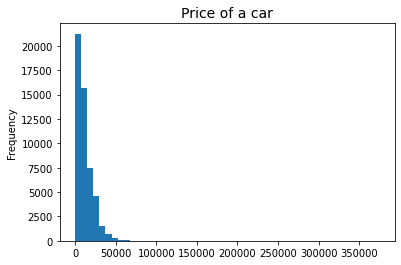

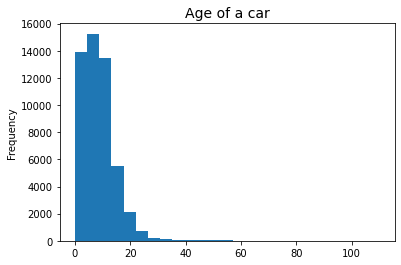

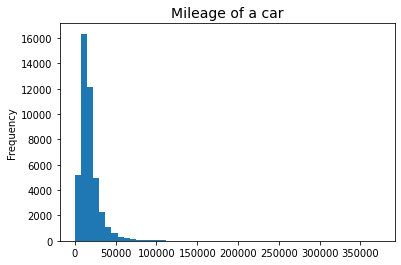

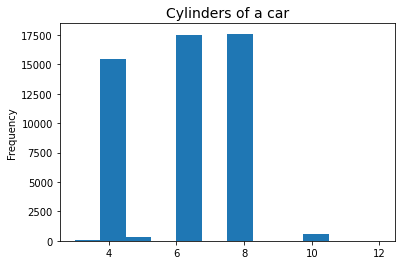

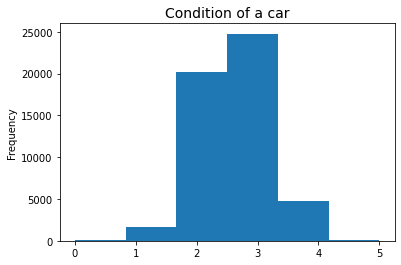

In [18]:
# drawing some histograms on raw data

def show_hist_chart(dataframe: pd.core.frame.DataFrame, column_name: str, bins: int = 10):
    dataframe.plot(
        kind='hist', y=column_name, bins=bins, fontsize=10, legend=None
    )
    beautify_column_name = column_name[0].upper() + column_name[1:].replace('_', ' ')
    plt.title(f'{beautify_column_name} of a car', fontsize=14)
    plt.show()

show_hist_chart(cars, 'price', bins=50)
show_hist_chart(cars, 'age', bins=25)
show_hist_chart(cars, 'mileage', bins=50)
show_hist_chart(cars, 'cylinders', bins=12)
show_hist_chart(cars, 'condition', bins=6)

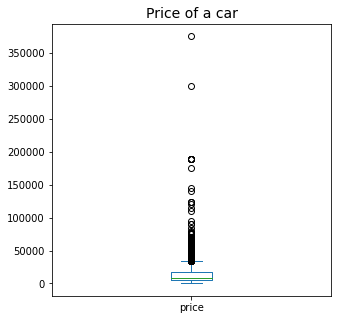

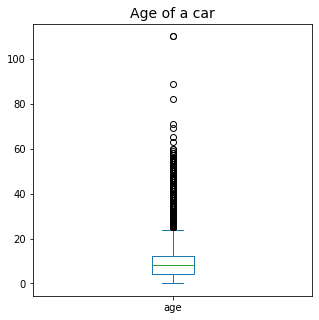

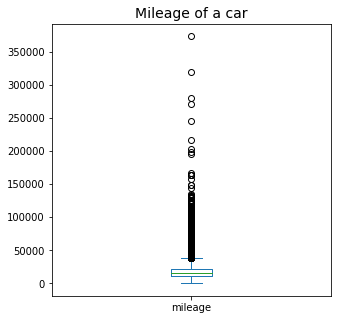

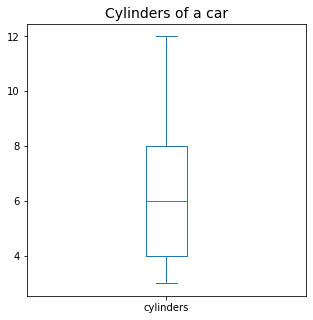

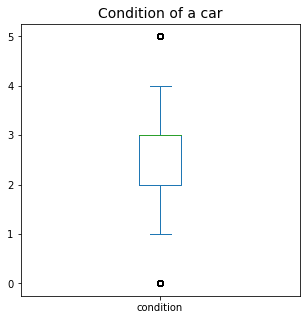

In [19]:
# boxplots of the same columns could show outliers better

def show_box_plot(dataframe: pd.core.frame.DataFrame, column_name: str):
    dataframe.plot(
        kind='box', y=column_name, figsize=(5, 5), fontsize=10
    )
    beautify_column_name = column_name[0].upper() + column_name[1:].replace('_', ' ')
    plt.title(f'{beautify_column_name} of a car', fontsize=14)
    plt.show()
    
show_box_plot(cars, 'price')
show_box_plot(cars, 'age')
show_box_plot(cars, 'mileage')
show_box_plot(cars, 'cylinders')
show_box_plot(cars, 'condition')

We have some number of outliers in 'price' (6.7%), vehicle's 'age' (3.2%) and 'mileage' (7.6%) columns that distort our data. Removing them would make our histograms more readable.

We cannot talk about any outliers in 'cylinders' and 'condition' columns since they are qualitative values. 

In [20]:
# calculating limits for outliers and filtering our dataset

price_toohigh = cars['price'].quantile(0.75) + cars['price'].quantile(0.75) - cars['price'].quantile(0.25)
price_filter = cars['price'] <= price_toohigh

age_toohigh = cars['age'].quantile(0.75) + cars['age'].quantile(0.75) - cars['age'].quantile(0.25)
age_filter = cars['age'] <= age_toohigh

mileage_toohigh = cars['mileage'].quantile(0.75) + cars['mileage'].quantile(0.75) - cars['mileage'].quantile(0.25)
mileage_filter = cars['mileage'] <= mileage_toohigh

clean_cars = cars[price_filter & age_filter & mileage_filter].reset_index(drop=True)
clean_cars.describe()

,price,model_year,condition,cylinders,odometer,days_listed,year_posted,age,mileage
count,36125.000000,36125.000000,36125.000000,36125.000000,36125.000000,36125.000000,36125.000000,36125.000000,36125.000000
mean,10153.372429,2009.534173,2.615806,6.018990,119092.910228,39.642076,2018.318311,8.784138,15135.402159
std,6799.393441,4.590148,0.696670,1.644382,60949.711305,28.147147,0.465828,4.588042,6744.549415
min,1.000000,1998.000000,0.000000,3.000000,0.000000,0.000000,2018.000000,0.000000,0.000000
25%,4950.000000,2006.000000,2.000000,4.000000,78000.000000,19.000000,2018.000000,5.000000,10571.000000
50%,8250.000000,2010.000000,3.000000,6.000000,118000.000000,33.000000,2018.000000,8.000000,14460.000000
75%,14500.000000,2013.000000,3.000000,8.000000,157065.000000,54.000000,2019.000000,12.000000,19289.000000
max,28671.000000,2019.000000,5.000000,12.000000,527835.000000,271.000000,2019.000000,20.000000,32451.000000


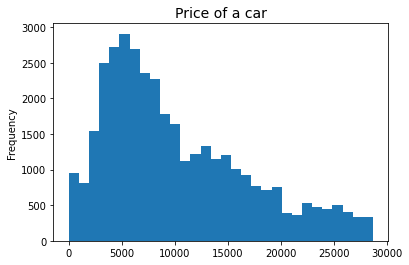

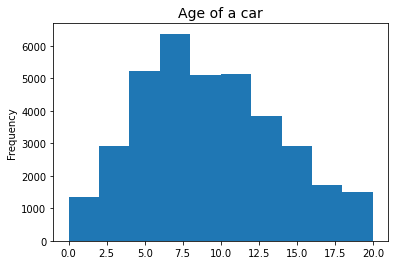

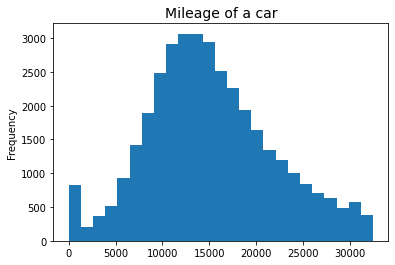

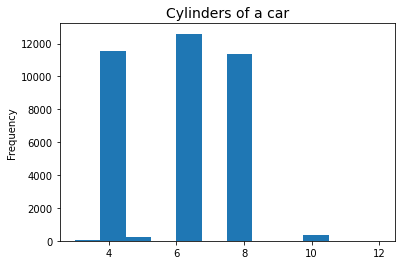

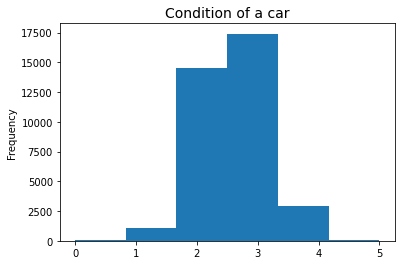

In [21]:
# repeating histograms with clean data

show_hist_chart(clean_cars, 'price', bins=30)
show_hist_chart(clean_cars, 'age', bins=10)
show_hist_chart(clean_cars, 'mileage', bins=25)
show_hist_chart(clean_cars, 'cylinders', bins=12)
show_hist_chart(clean_cars, 'condition', bins=6)

### Conclusion

After the cleaning, we could see the distribution of the data better. 

The 'price' is right-skewed, with the mean of 10153, the median of 8250 and half of the entries between 4950 and 14500.

The 'age' is approximately normal, with the mean of 8.8, the median of 8 and half of the entries between 5 and 12 years.

The 'mileage' is right-skewed and also has a peak at zero. The mean is 15K, the median is 14.5K, and half of the entries are between 10.5K and 19.3K

Most of the cars have 4, 6 or 8 'cylinders'. Other types of engines are infrequent.

And most of the cars are in good or excellent 'condition'.


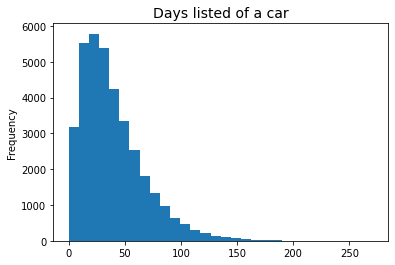

count    36125.000000
mean        39.642076
std         28.147147
min          0.000000
25%         19.000000
50%         33.000000
75%         54.000000
max        271.000000
Name: days_listed, dtype: float64

In [22]:
show_hist_chart(clean_cars, 'days_listed', bins=30)
clean_cars['days_listed'].describe()

### Conclusion

The distribution of how many days advertisements were displayed is right-skewed. While half of them are removed in 33 days, some are listed for more than 100 and even 200 days. These durations move our mean up to 39.7 days.

In [23]:
def show_bar_plot(dataframe: pd.core.frame.DataFrame, column_name: str):
    dataframe.plot(
        kind='bar', y=column_name, rot=0, figsize=(10, 5), fontsize=10
    )
    beautify_column_name = column_name[0].upper() + column_name[1:].replace('_', ' ')
    plt.title(f'{beautify_column_name} for each vehicle type', fontsize=14)
    plt.xlabel('')
    plt.show()

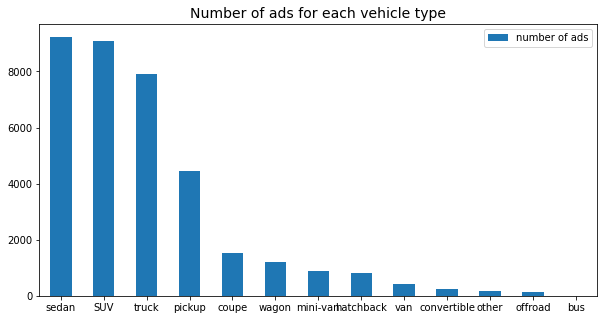

In [24]:
by_type = clean_cars.pivot_table(index='type', values='price', aggfunc=['count', 'mean'])
by_type.columns = ['number of ads', 'average price']

show_bar_plot(by_type.sort_values('number of ads', ascending=False), 'number of ads')

### Conclusion

We have the most number of ads for sedan and SUV types. So let's explore them further.

In [25]:
# functions for drawing scatter plots and several boxplots on the same canvas

def show_scatter_plot(dataframe: pd.core.frame.DataFrame, column_x: str, column_y: str):
    dataframe.plot(
        kind='scatter', x=column_x, y=column_y, figsize=(5, 5), fontsize=10, 
    )
    beautify_column_y = column_y[0].upper() + column_y[1:].replace('_', ' ')
    beautify_column_x = column_x[0].upper() + column_x[1:].replace('_', ' ')

    plt.title(f'{beautify_column_y} from {beautify_column_x}', fontsize=14)
    plt.xlabel('')
    plt.show()
    
def show_several_box_plots(dataframe: pd.core.frame.DataFrame, column_name: str, by: str):
    data_toplot = []
    names = []
    for name, group in dataframe.groupby(by):
        if len(group) > 50:
            data_toplot.append(group[column_name].astype(object))
            names.append(name)
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.boxplot(np.array(data_toplot, dtype=object))
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)    
    beautify_y = column_name[0].upper() + column_name[1:].replace('_', ' ')
    beautify_x = by[0].upper() + by[1:].replace('_', ' ')
    ax.set(
        axisbelow=True,  
        xlabel=beautify_x,
        ylabel=beautify_y,
    )
    ax.set_title(f'{beautify_y} for {beautify_x}', fontsize=14)
    ax.set_xticklabels(names, fontsize=10)
    plt.show()    

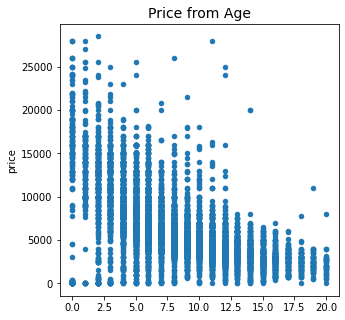

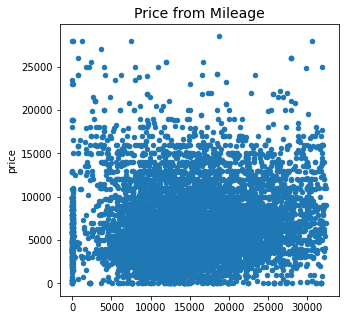

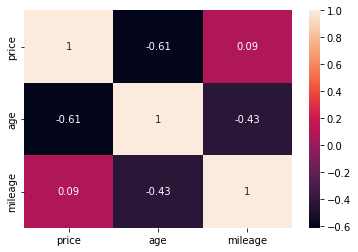

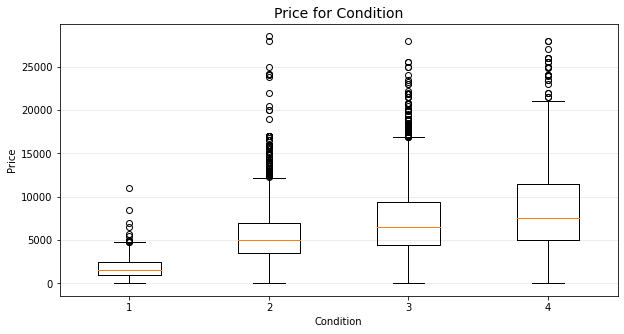

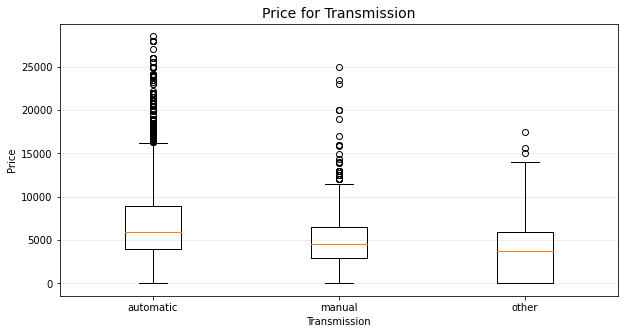

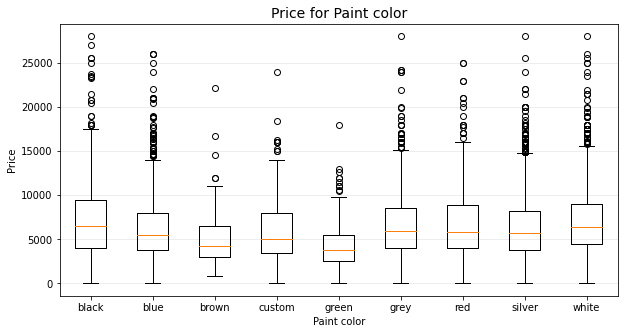

In [26]:
sedans = clean_cars.loc[clean_cars['type']=='sedan', ['price', 'age', 'mileage','condition','transmission', 'paint_color']].reset_index(drop=True)
show_scatter_plot(sedans, 'age', 'price')
show_scatter_plot(sedans, 'mileage', 'price')
sedans_corr = sedans.loc[:,['price', 'age', 'mileage']].corr()
sn.heatmap(sedans_corr, annot=True)
plt.show()

show_several_box_plots(sedans[['price', 'condition']], 'price', 'condition')
show_several_box_plots(sedans[['price', 'transmission']], 'price', 'transmission')
show_several_box_plots(sedans.loc[sedans['paint_color'].notna(),['price', 'paint_color']], 'price','paint_color')

### Conclusion

Exploring the sedan 'type' subset, we could see that its price negatively correlates with age. Also, there is a weak correlation between the price and the condition and none between the price and mileage.

Also, we could see that, on average, sedans with automatic transmission are more expensive than manual. And other transmissions are the cheapest, but the difference is not definitive.

Looking at paint colour, we don't see any influence on price.

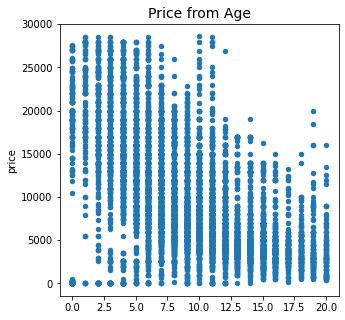

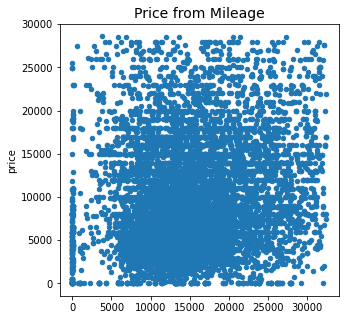

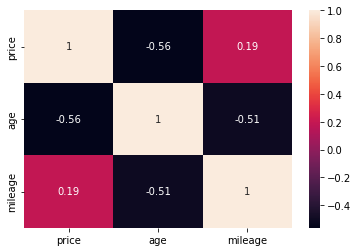

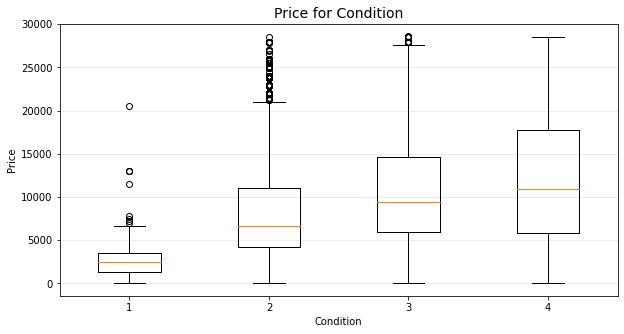

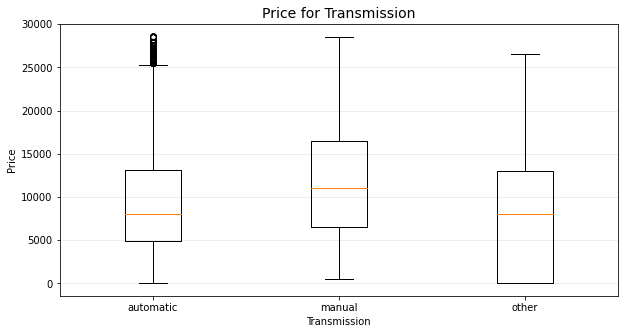

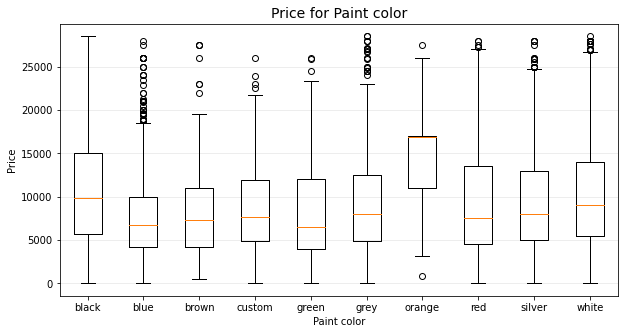

In [27]:
suvs = clean_cars.loc[clean_cars['type']=='SUV', ['price', 'age', 'mileage','condition','transmission', 'paint_color']]
show_scatter_plot(suvs, 'age', 'price')
show_scatter_plot(suvs, 'mileage', 'price')
suvs_corr = suvs.loc[:,['price', 'age', 'mileage']].corr()
sn.heatmap(suvs_corr, annot=True)
plt.show()

show_several_box_plots(suvs[['price', 'condition']], 'price', 'condition')
show_several_box_plots(suvs[['price', 'transmission']], 'price', 'transmission')
show_several_box_plots(suvs.loc[suvs['paint_color'].notna(),['price', 'paint_color']], 'price','paint_color')

### Conclusion

Now let's have a look at the SUV's subset. Again, as with the sedans, we have some negative correlation between the price and the age, none between the price and mileage and a weak one between the price and condition.

The automatic transmission type is cheaper here, but the difference is also not definitive. And no influence of the paint colour on price.

## Overall conclusion

Here we have a dataset of about 50 thousand vehicles advertisements. We have a lot of missing values here, and not all of them we could reasonably fill, for example, paint colour.

I calculated some additional values for further analysis (age and mileage). Then I removed entries with price, age, and mileage outliers. It gave me a smaller (about 70% volume) dense subset.

From this cleaner subset, I took two types of vehicles (sedans and SUVs) and explored how different aspects affect the price. There is some negative correlation between the car's age and its price but not very strong. And there is almost no influence from the mileage, condition, transmission or colour. I suppose the main reason is that we took too broad categories (very different cars are called sedans or SUVs). Splitting them into smaller subcategories or taking other types could give better results.